<h2>Importing libs<h2>

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

<h2>Load Dataset<h2>

In [60]:
df=pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h2>Data Summary<h2>

In [61]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h2>Data Preprocessing<h2>

In [65]:
df.dropna(subset=['Age','Embarked'],axis=0, inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

In [66]:
df=df.copy()
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1, inplace=True)

In [67]:
#df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.fillna({'Age': df['Age'].mean() , 'Embarked': df['Embarked'].mode()[0]}, inplace=True)
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [68]:
df = pd.get_dummies(df , columns=['Embarked'], drop_first=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,False,True
1,1,1,female,38.0,1,0,71.2833,False,False
2,1,3,female,26.0,0,0,7.9250,False,True
3,1,1,female,35.0,1,0,53.1000,False,True
4,0,3,male,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,True,False
886,0,2,male,27.0,0,0,13.0000,False,True
887,1,1,female,19.0,0,0,30.0000,False,True
889,1,1,male,26.0,0,0,30.0000,False,False


In [69]:
df[['Pclass','Age','SibSp','Fare','Parch']]=df[['Pclass','Age','SibSp','Fare','Parch']]/df[['Pclass','Age','SibSp','Fare','Parch']].max()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,1.000000,male,0.2750,0.2,0.000000,0.014151,False,True
1,1,0.333333,female,0.4750,0.2,0.000000,0.139136,False,False
2,1,1.000000,female,0.3250,0.0,0.000000,0.015469,False,True
3,1,0.333333,female,0.4375,0.2,0.000000,0.103644,False,True
4,0,1.000000,male,0.4375,0.0,0.000000,0.015713,False,True
...,...,...,...,...,...,...,...,...,...
885,0,1.000000,female,0.4875,0.0,0.833333,0.056848,True,False
886,0,0.666667,male,0.3375,0.0,0.000000,0.025374,False,True
887,1,0.333333,female,0.2375,0.0,0.000000,0.058556,False,True
889,1,0.333333,male,0.3250,0.0,0.000000,0.058556,False,False


<h2>Exploratory Data Analysis<h2>

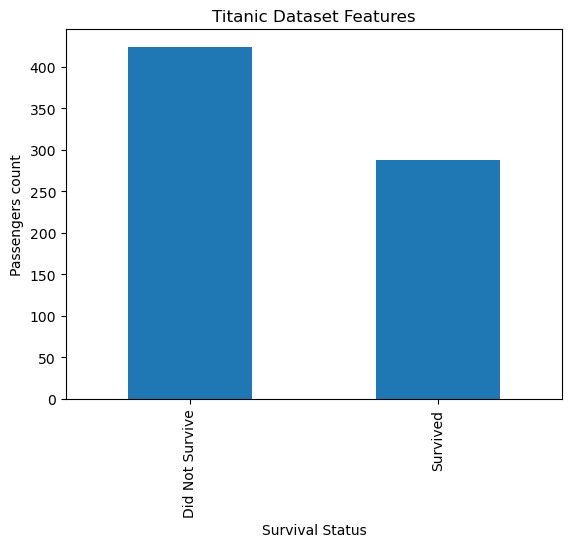

In [70]:
df['Survived'].value_counts().plot(kind='bar')
plt.title('Titanic Dataset Features')
plt.xlabel('Survival Status')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.ylabel('Passengers count')
plt.show()

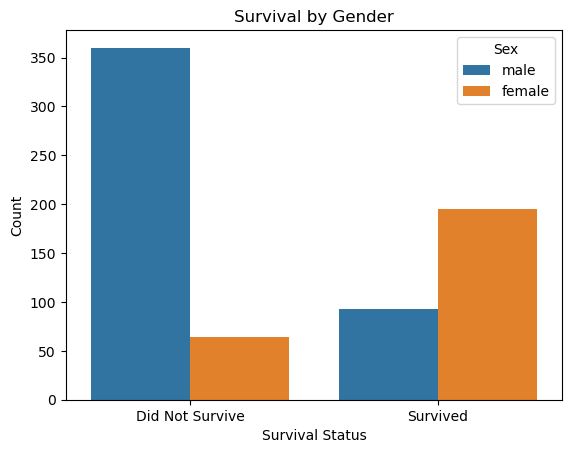

In [71]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.xlabel('Survival Status')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.ylabel('Count')
plt.show()

<h2>Model Training<h2>

In [72]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_save_model(X, y):
    model = LogisticRegression()
    model.fit(X, y)
    with open("model.pkl", "wb") as f:
        pickle.dump(model, f)
    return model

model = train_and_save_model(X_train, y_train)


<h2>Model Evaluation<h2>

In [74]:
predictions = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report\n",classification_report(y_test, predictions))

Accuracy: 0.7902097902097902
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        80
           1       0.84      0.65      0.73        63

    accuracy                           0.79       143
   macro avg       0.80      0.78      0.78       143
weighted avg       0.80      0.79      0.79       143



<h2>Conclusion<h2>

- The titanic dataset revels the survival status that predicts whether a
passenger on the Titanic survived or not.
- Logistic Regression achieved about 79% accuracy.